# Gerekli Kütüphaneleri Yükleme


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

# Veri İndirme

In [14]:
df = pd.read_csv('FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


# Özellik Seçimi


In [15]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)


,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


# Emisyon ve Motor Hacmi Grafiği


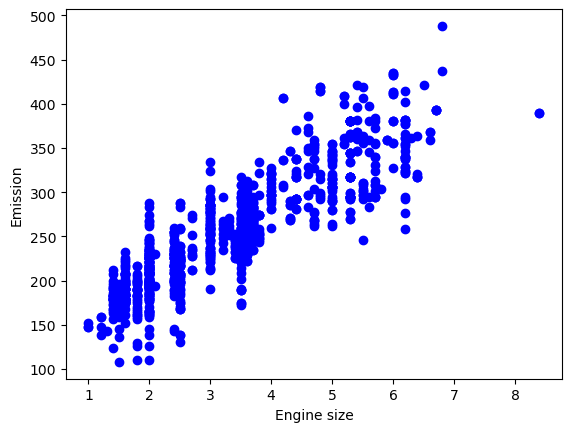

In [16]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()


# Eğitim ve Test Verilerini Ayırma


In [17]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]


# Eğitim Verisinin Dağılımı


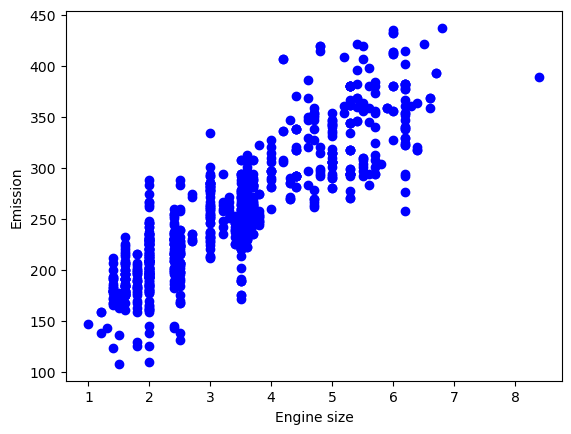

In [18]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()


# Çoklu Doğrusal Regresyon Modeli Kurma


In [19]:
from sklearn import linear_model

regr = linear_model.LinearRegression()

x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(x, y)

# Katsayıları yazdır
print ('Coefficients: ', regr.coef_)

#x (bağımsız değişkenler): Modelin CO2 emisyonlarını tahmin ederken kullandığı girdiler.
#y (bağımlı değişken): Modelin tahmin etmeye çalıştığı çıktı değişkeni.
#Bu ayrım, bağımsız değişkenlerle bağımlı değişken arasında bir ilişki kurmak ve modelin bu ilişkiyi öğrenmesini sağlamak için yapılır. 
#Bu katsayılar bize, motor hacminin (ENGINESIZE), silindir sayısının (CYLINDERS) ve yakıt tüketiminin (FUELCONSUMPTION_COMB) CO2 emisyonlarına olan etkisini gösterir. 
#Örneğin, yakıt tüketimi arttıkça CO2 emisyonları da artıyor. 
#Motor hacmi daha büyük olan araçlar ise daha fazla CO2 emisyonu yapıyor gibi bir sonuç çıkarabiliriz.



Coefficients:  [[11.58006438  7.18308951  9.19510425]]


# Modeli Test Etme ve Performans Ölçme


In [20]:
y_hat = regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])

# Hata Kareler Toplamı : Bu satırda modelin yaptığı tahminler (y_hat) ile gerçek değerler (y) arasındaki farkların (hataların) karesi alınıyor ve bu karelerin ortalaması hesaplanıyor. Bu ölçüt, modelin tahminlerinin ne kadar doğru olduğunu gösterir.
print("Residual sum of squares: %.2f" % np.mean((y_hat - y) ** 2))

# Varyans skoru : Bu satırda regr.score(x, y) fonksiyonu, modelin varyans skorunu (R² skoru) hesaplar. R² skoru, modelin ne kadar iyi bir tahmin yaptığını, bağımsız değişkenlerin bağımlı değişken üzerindeki varyansını ne kadar iyi açıkladığını gösterir.
print('Variance score: %.2f' % regr.score(x, y))

#Bu kod parçası, modelin performansını değerlendirmek için kullanılıyor
#İki ana ölçüt hesaplanıyor: Hata Kareler Toplamı ve Varyans Skoru.


#0.88'lik varyans skoru, modelin veri setini oldukça iyi açıkladığını gösterir. 1.0’a ne kadar yaklaşıyorsa, model o kadar iyi sonuç veriyor demektir.
#522.29'luk RSS değeri, modelin hata düzeyinin kabul edilebilir seviyede olduğunu gösteriyor. Eğer bu değer daha da küçük olsaydı, modelin daha iyi performans gösterdiğini söyleyebilirdik. Ama bu sonuç genel olarak çok kötü değil.


Residual sum of squares: 522.29
Variance score: 0.88


C:\Users\asli_\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


# Alternatif Model


In [21]:
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(x, y)

# Katsayıları yazdır
print ('Coefficients: ', regr.coef_)

y_ = regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(test[['CO2EMISSIONS']])

# Hata Kareler Toplamı
print("Residual sum of squares: %.2f"% np.mean((y_ - y) ** 2))

# Varyans skoru
print('Variance score: %.2f' % regr.score(x, y))


Coefficients:  [[11.61203318  6.80381146  6.15023641  2.69266702]]
Residual sum of squares: 524.68
Variance score: 0.87


C:\Users\asli_\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
